# Aviation Risk Assessment

## Loading and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The AviationData dataset has 31 columns and 88889 rows or observations, which have both float and character data types. Next, a quick peek into the summary statisics of the numeric variables present in the dataset.

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


What about the column names? 

In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Since the column names  have a uniform naming system there are no changes needed. Let's proceed to create a copy. 

In [7]:
df1= df.copy(deep=True)

In [8]:
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

With the dataset having 88889 observations we have to proceed to remove columns with more than half of the obersavtions missing. Additionally, any column deemed not statistically significant.

In [9]:
half_threshold = len(df) / 2
cols_with_half_missing = df.columns[df.isnull().sum() > half_threshold]

# Print or list them
print("Columns with more than 50% missing values:")
print(cols_with_half_missing)

Columns with more than 50% missing values:
Index(['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
       'Schedule', 'Air.carrier'],
      dtype='object')


In [10]:
df1 = df1.dropna(thresh=half_threshold, axis=1)
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87572 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [12]:
for col in df1.columns:
    unique_vals = df1[col].unique()
    print(f"{col} — {len(unique_vals)} unique values")
    print(unique_vals[:10])  # Show first 10 unique values
    print("-" * 40)


Event.Id — 87951 unique values
['20001218X45444' '20001218X45447' '20061025X01555' '20001218X45448'
 '20041105X01764' '20170710X52551' '20001218X45446' '20020909X01562'
 '20020909X01561' '20020909X01560']
----------------------------------------
Investigation.Type — 2 unique values
['Accident' 'Incident']
----------------------------------------
Accident.Number — 88863 unique values
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' 'LAX96LA321' 'CHI79FA064'
 'NYC79AA106' 'CHI81LA106' 'SEA82DA022' 'NYC82DA015' 'MIA82DA029']
----------------------------------------
Event.Date — 14782 unique values
['1948-10-24' '1962-07-19' '1974-08-30' '1977-06-19' '1979-08-02'
 '1979-09-17' '1981-08-01' '1982-01-01' '1982-01-02' '1982-01-03']
----------------------------------------
Location — 27759 unique values
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' 'EUREKA, CA'
 'Canton, OH' 'BOSTON, MA' 'COTTON, MN' 'PULLMAN, WA' 'EAST HANOVER, NJ'
 'JACKSONVILLE, FL']
----------------------------------------
Co

The above steps check the unique values in each of the remaining columns. Given the large size of this dataset, it is safe to assume that columns whose unique values caount is  close to or same as the total observations can be considered as not relevant for any analysis. This is because they do bring much value because they are identifiers. These columns are Accident.Number, and Registration.Number. Additionally, since we are a well known company we have no interests with amateur built aircraft since they pose too much risk. The focus is on acquisition of tested and approved planes, hence no research and development projects

In [13]:
columns_to_drop = ['Accident.Number', 'Registration.Number','Amateur.Built']
df1 = df1.drop(columns=columns_to_drop, )


In [14]:
df1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 22 entries, Event.Id to Publication.Date
dtypes: float64(5), object(17)
memory usage: 14.9+ MB


Now let's deal with the missing values in the object dtype columns by replacing the missing values with "unknown'. This was preferred instead of mode since the missing values are many and cause to much skeweness.  

In [15]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].fillna('Unknown')


For the numeric dtypes we can replace the unkowns with mean

In [16]:
for col in df1.select_dtypes(include='float').columns:
    if df1[col].isnull().any():
        mean_val = df1[col].mean()
        df1[col] = df1[col].fillna(mean_val)

In [17]:
df1.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

Now, let's check drop and all duplicates

In [18]:
df1.duplicated().sum()  


28

In [19]:
df1 = df1.drop_duplicates()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88861 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88861 non-null  object 
 1   Investigation.Type      88861 non-null  object 
 2   Event.Date              88861 non-null  object 
 3   Location                88861 non-null  object 
 4   Country                 88861 non-null  object 
 5   Airport.Code            88861 non-null  object 
 6   Airport.Name            88861 non-null  object 
 7   Injury.Severity         88861 non-null  object 
 8   Aircraft.damage         88861 non-null  object 
 9   Make                    88861 non-null  object 
 10  Model                   88861 non-null  object 
 11  Number.of.Engines       88861 non-null  float64
 12  Engine.Type             88861 non-null  object 
 13  Purpose.of.flight       88861 non-null  object 
 14  Total.Fatal.Injuries    88861 non-null

In [21]:
# Standardize all inconsistent missing notations to "Unknown"
other = ["Missing", "UNK", "Unk", "None", "NONE"]
df1.replace(other, "Unknown", inplace=True)


df1[df1.select_dtypes(include='object').columns] = (
    df1.select_dtypes(include='object').replace(other, "Unknown")
)


In [22]:
# Function to classify injury severity
def classify_injury_severity(value):
    if pd.isna(value) or str(value).strip().lower() in ['', 'unavailable', 'unknown']:
        return 'unknown'
    
    value = str(value).strip().lower()

    if 'non-fatal' in value:
        return 'Non-Fatal'
    elif 'fatal' in value:
        return 'Fatal'
    elif 'incident' in value:
        return 'Incident'
    elif 'accident' in value:
        return 'Accident (No Injury)'
    else:
        return 'unknown'

df1['Injury.Severity'] = df1['Injury.Severity'].apply(classify_injury_severity)
df1['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'unknown'], dtype=object)

# Exploratort Data Analysis
## Univariate Analysis

In [23]:
# Top 10 Locations
print("Top 10 Locations:")
print(df1['Location'].value_counts().head(10).to_string()+"\n")

# Top 10 Countries
print("Top 10 Countries:")
print(df1['Country'].value_counts().head(10).to_string()+"\n")



Top 10 Locations:
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        192
CHICAGO, IL        184
FAIRBANKS, AK      174
TUCSON, AZ         142
PHOENIX, AZ        132
ORLANDO, FL        132
ENGLEWOOD, CO      131

Top 10 Countries:
United States     82223
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Unknown             229
Spain               226
Bahamas             216



United States has by far the largest observations in dataset. Given the rarity of accidents in other countries we have to focus the investigation on the United States.
Reason: bias or lack of adequate data for the other countries.Since research is based on quality data, it wise to invest in a market where most, if not all, of the variables are known. 

In [24]:
dfUS = df1[df1.Country == "United States"]

In [25]:
state_codes = pd.read_csv("USState_codes.csv",encoding="latin1",low_memory=False)
state_codes.info()
## Feature Engineering
dfUS['Location'] = dfUS['Location'].str.replace(',', '', regex=False).str.lower()

dfUS['state_abbr'] = dfUS['Location'].str[-2:]

state_abbr_to_name = {
    abbr.lower(): name.lower()
    for abbr, name in zip(state_codes['Abbreviation'], state_codes['US_State'])
}
dfUS['State'] = dfUS['state_abbr'].map(state_abbr_to_name)

dfUS['Location'] = dfUS['Location'].str[:-3].str.strip()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [26]:
print("Top 10 Makes:")
print(dfUS['Make'].value_counts().head(10).to_string()+"\n")


# Top 10 Models
print("Top 10 Models:")
print(dfUS['Model'].value_counts().head(10).to_string()+"\n")


Top 10 Makes:
Cessna     21569
Piper      11661
CESSNA      4280
Beech       4167
PIPER       2507
Bell        1881
Boeing      1157
Grumman     1075
Mooney      1074
BEECH        892

Top 10 Models:
152          2321
172          1636
172N         1136
PA-28-140     910
150           790
172M          773
172P          679
180           617
182           589
PA-18-150     578



Before proceeding with further exploration, we will have to ensure all values in the "Make" column are uniformly formatted to remove any redudancy in group categoring

In [27]:
dfUS['Make'] = dfUS['Make'].str.title()
print("Top 10 Makes:")
print(dfUS['Make'].value_counts().head(10).to_string()+"\n")


Top 10 Makes:
Cessna      25849
Piper       14168
Beech        5059
Bell         2284
Boeing       1480
Mooney       1293
Grumman      1141
Bellanca     1040
Robinson      917
Hughes        874



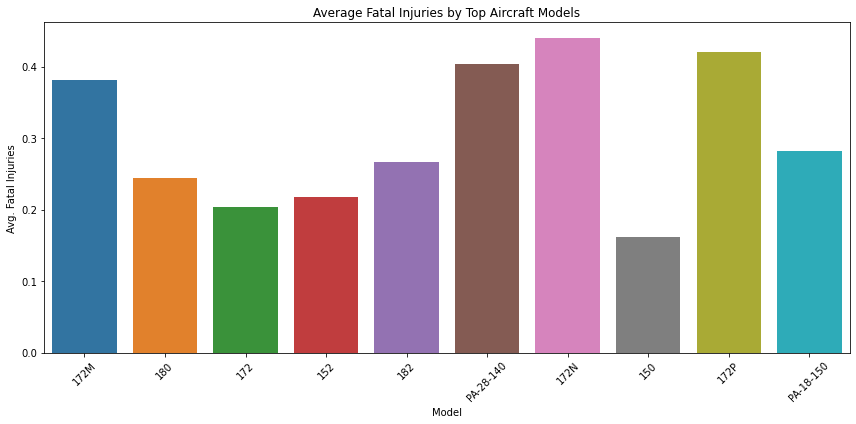

In [28]:
top_models = dfUS['Model'].value_counts().head(10).index
model_fatal_df = dfUS[dfUS['Model'].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.barplot(data=model_fatal_df, x='Model', y='Total.Fatal.Injuries', estimator=np.mean, ci=None)
plt.title('Average Fatal Injuries by Top Aircraft Models')
plt.ylabel('Avg. Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The data reveals that Cessna is by far the most frequently involved aircraft make in reported aviation accidents or incidents, with over 25,000 occurrences, followed by Piper and Beech. These makes are commonly used in general aviation, which may contribute to their higher representation. Notably, Boeing appears fourth, reflecting its presence in commercial aviation despite a lower volume of flights compared to smaller aircraft. In terms of locations, cities like Anchorage, AK and Miami, FL top the list, likely due to their busy regional traffic and challenging flying conditions. Albuquerque, Houston, and Chicago also rank high, suggesting significant aviation activity or concentrated reporting in those areas. The United States overwhelmingly leads in accident reports, which is expected due to the country's vast air traffic volume and comprehensive reporting system. Other countries such as Brazil, Canada, and Mexico follow distantly, with accident counts in the hundreds, emphasizing the U.S.-centric nature of this dataset.

In [29]:
# Convert to datetime format
dfUS['Event.Date'] = pd.to_datetime(dfUS['Event.Date'], errors='coerce')

# Extract year into a new column
dfUS['Event.Year'] = dfUS['Event.Date'].dt.year
# Group by year and count events
events_per_year = dfUS.groupby('Event.Year').size().reset_index(name='Accident_Count')

# Preview
print(events_per_year.head())


   Event.Year  Accident_Count
0        1948               1
1        1962               1
2        1974               1
3        1977               1
4        1979               2


From the time series plot below, a huge spike in aviation accident around 1980. The 80's era ushered a boom in air travel after the 1978 Airline Deregulation Act. A rise of commercial and low cost carries, thanks to government deregulization, can be attributed to this spike although later interventions was able to control this crisis. A five year forecast will be added using tableau.

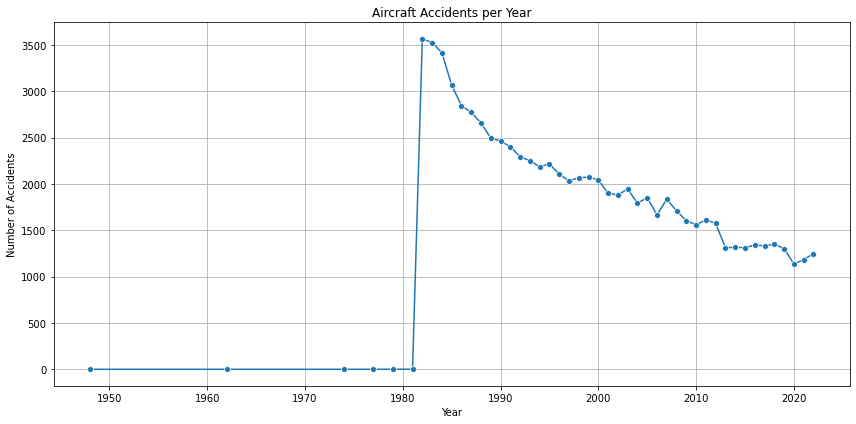

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_per_year, x='Event.Year', y='Accident_Count', marker='o')
plt.title('Aircraft Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

### Categorical Columns Disribution

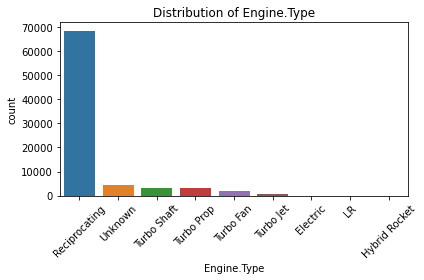

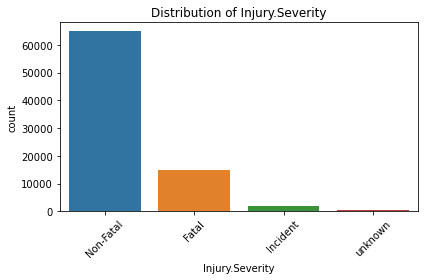

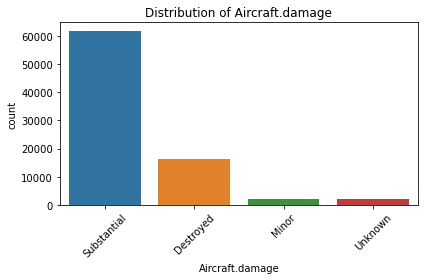

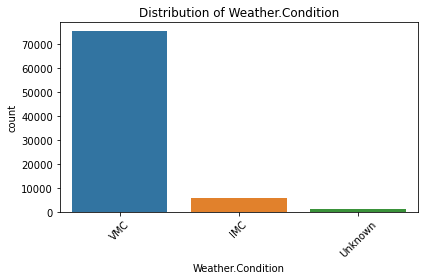

In [31]:
categorical_columns = [
    'Engine.Type',
    'Injury.Severity',
    'Aircraft.damage',
    'Weather.Condition',
]
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=dfUS, x=col, order=dfUS[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    ,


1.For the engine type, the reciprocating engine has the highest frequency of incidents while the hybrid pocket has the lowest.  
2. Most accident severity are non fatal, more evidence why air travels is the safest mode of transport.  
3. Should a plane fall, damage is most likely to be substantial. Hence, recovering and fixing these planes is not viable which means  
4. Shockingly, most accident happen in visual meteorological conditions which should be easier for pilots meaning that weather does not pose a huge threat.  
Also, we can infer that the type of aircraft is the key variable.

### Numerical Columns Distribution

In [32]:
numerical_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]
# Identify numeric columns
numeric_cols = df1.select_dtypes(include='number').columns

# Apply 95th percentile filter
for col in numeric_cols:
    upper_limit = df1[col].quantile(0.95)
    df1 = df1[df1[col] <= upper_limit]

# Optional: Reset index after filtering
df1.reset_index(drop=True, inplace=True)


print("Data shape after removing outliers:", df1.shape)


Data shape after removing outliers: (76015, 22)


Movin on, from the plot grid below, there are no distribtions in frequency of the various types of injuries. It indicates that it is safe to also invest in any aircraft without considering the number of paasenger. Moreover, the number of engines indicate that airplanes with one to two engines have a higher probability of accident/incident with three and above engines having more the lowest risk.

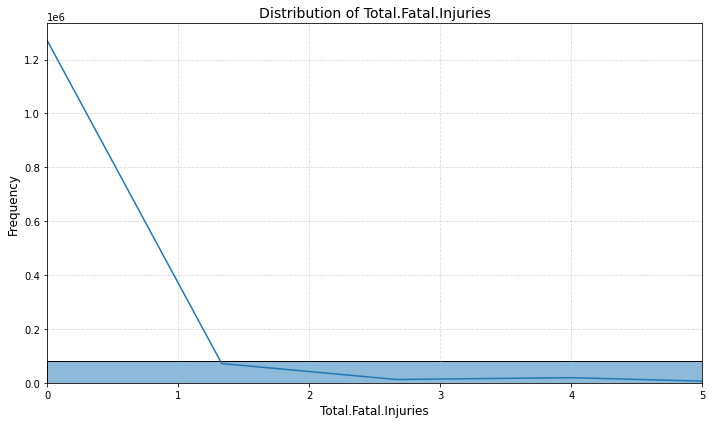

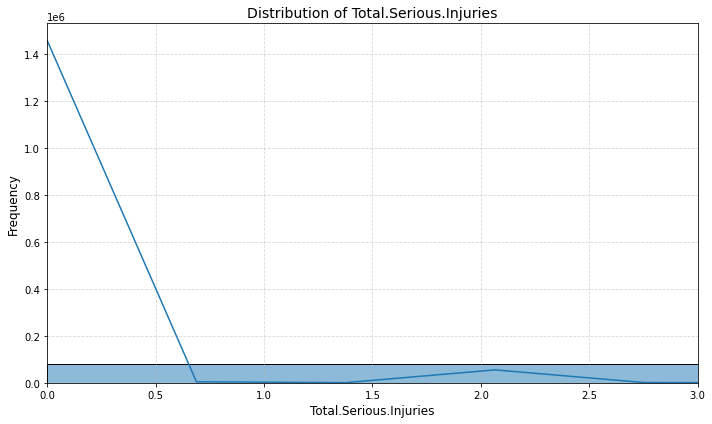

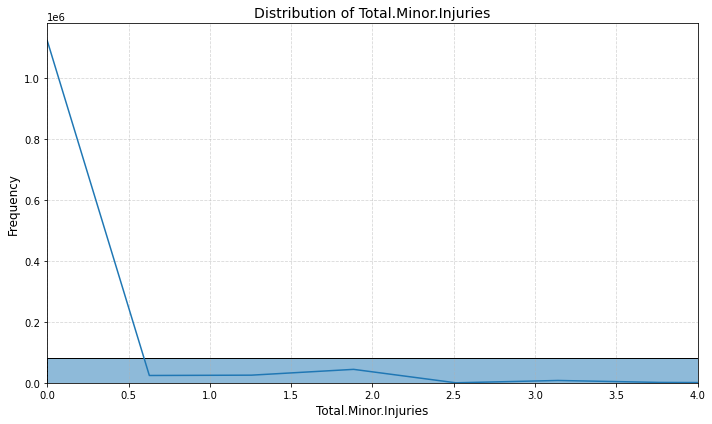

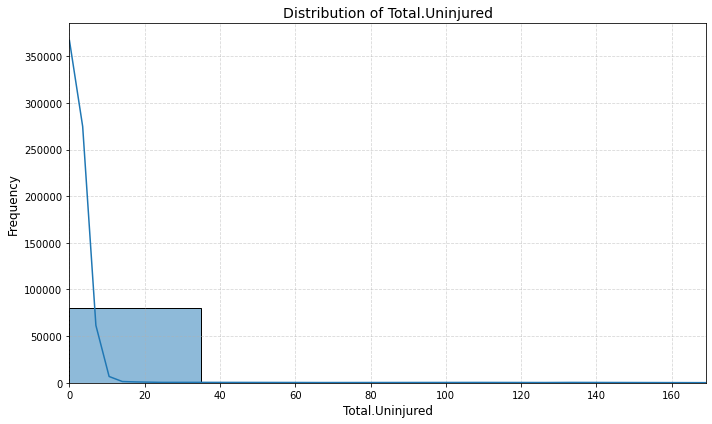

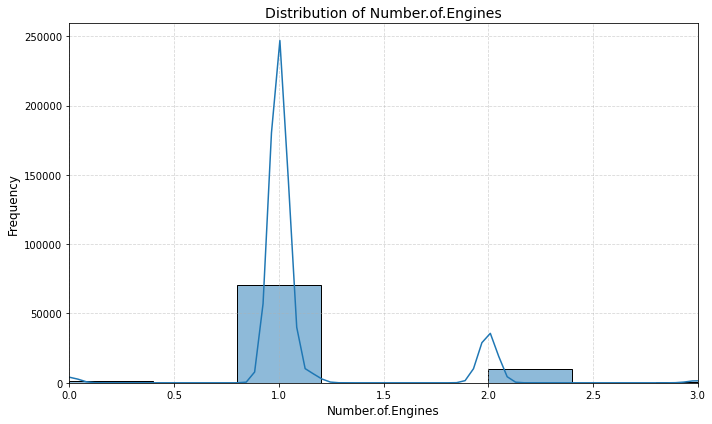

In [33]:
# Histograms with reduced x-axis range
for col in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Automatically set x-axis limit based on 99th percentile to reduce outlier impact
    x_max = dfUS[col].quantile(0.995)
    
    sns.histplot(data=dfUS, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, x_max)  # limit x-axis
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

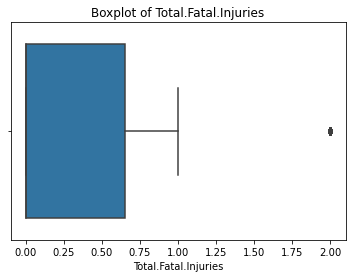

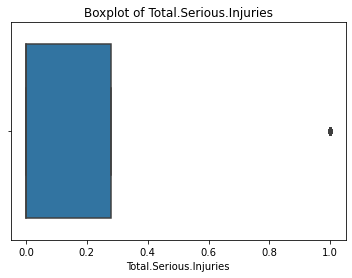

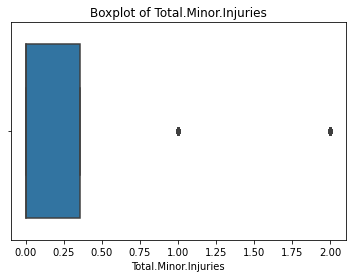

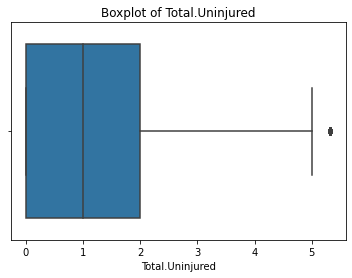

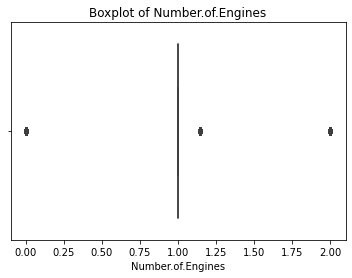

In [34]:

# Boxplots
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

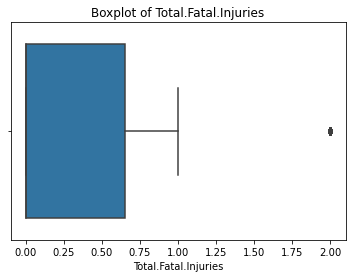

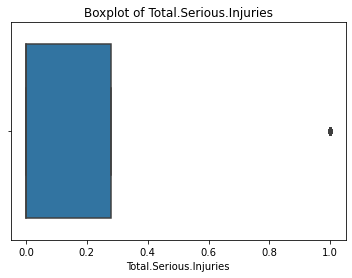

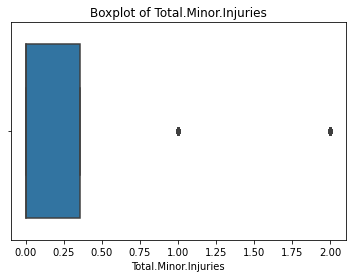

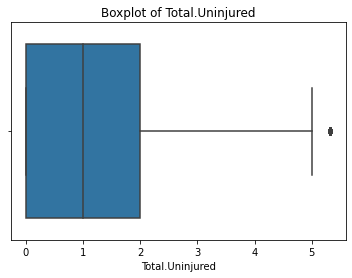

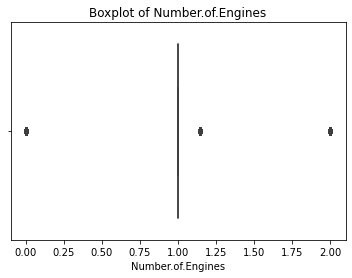

In [35]:

# Boxplots
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Bivariate  Analysis

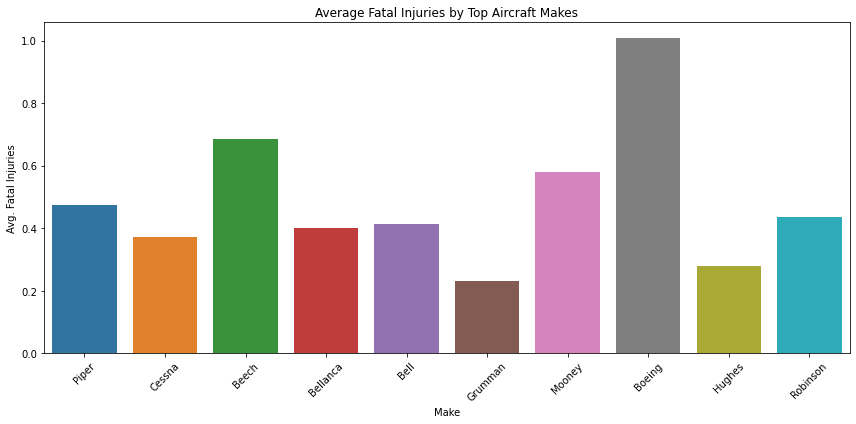

In [36]:
top_makes = dfUS['Make'].value_counts().head(10).index
make_fatal_df = dfUS[dfUS['Make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.barplot(data=make_fatal_df, x='Make', y='Total.Fatal.Injuries', estimator=np.mean, ci=None)
plt.title('Average Fatal Injuries by Top Aircraft Makes')
plt.ylabel('Avg. Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boeing has the highest fatal injuries while Grumman has the lowest. This is an indicator that grumman, with Cessna as a close second, has the highes survivability. 

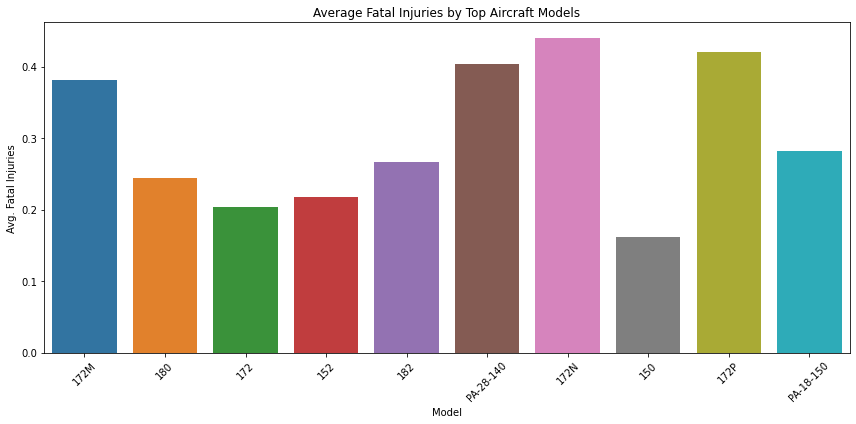

In [37]:
top_models = dfUS['Model'].value_counts().head(10).index
model_fatal_df = dfUS[dfUS['Model'].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.barplot(data=model_fatal_df, x='Model', y='Total.Fatal.Injuries', estimator=np.mean, ci=None)
plt.title('Average Fatal Injuries by Top Aircraft Models')
plt.ylabel('Avg. Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
##################################################


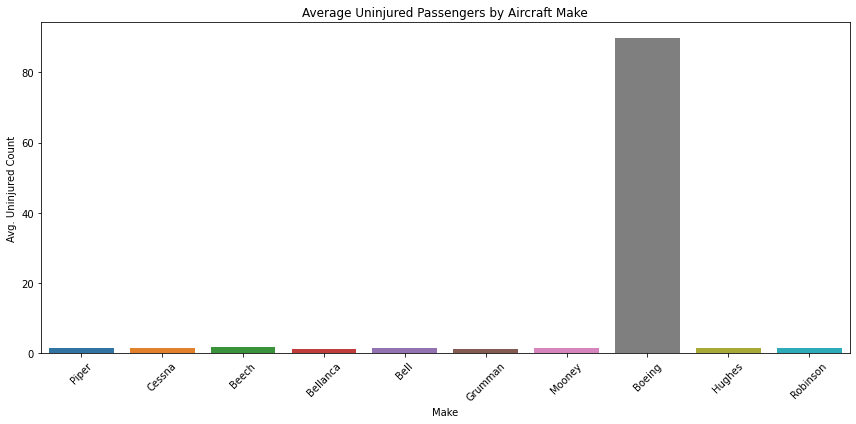

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=make_fatal_df, x='Make', y='Total.Uninjured', estimator=np.mean, ci=None)
plt.title('Average Uninjured Passengers by Aircraft Make')
plt.ylabel('Avg. Uninjured Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Surprisingly, Boeing shows the highest rate of uninjured meaning fatal injuries could be do to higher case of system malfunctions and not necessarily poor build strength

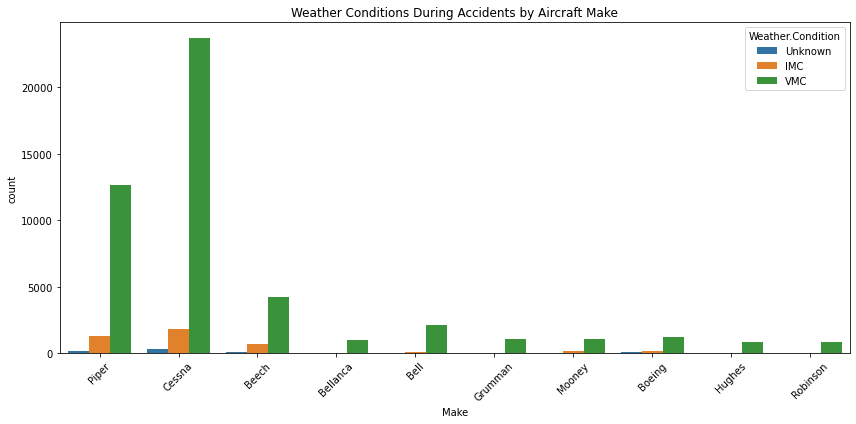

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=make_fatal_df, x='Make', hue='Weather.Condition')
plt.title('Weather Conditions During Accidents by Aircraft Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Clear, indication in VMC weather conditions there is a high frequency of accidents most of the airplane makes. However Cessna and Piper seem to be the highest indicating build weakness or endurance during violent weather conditions 

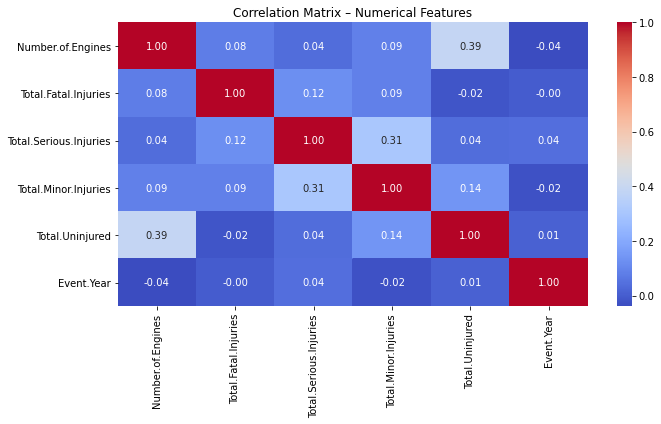

In [41]:
# Select only numeric columns
numeric_df = dfUS.select_dtypes(include=['number'])

# Generate correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix – Numerical Features')
plt.tight_layout()
plt.show()


The above heat map shows that there are no strong corrrelations relationships between the numeric variables. Most of the correlations coefficients are beow 0.01. However, the most statisticaly signficant obesrvation would be the relationship between the number of engines and the total uninjured is 0.35. Though small we can conclude that higher number of engines increase the total uninjured surviors. Hence we will not analyse the numerical varaibles any further.

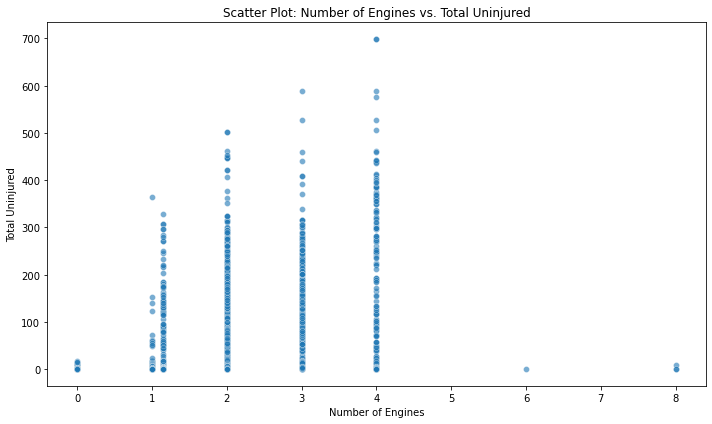

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfUS, x='Number.of.Engines', y='Total.Uninjured', alpha=0.6)
plt.title('Scatter Plot: Number of Engines vs. Total Uninjured')
plt.xlabel('Number of Engines')
plt.ylabel('Total Uninjured')
plt.tight_layout()
plt.show()

The above plot further consolidates that higher number of engines reduce casualties. 

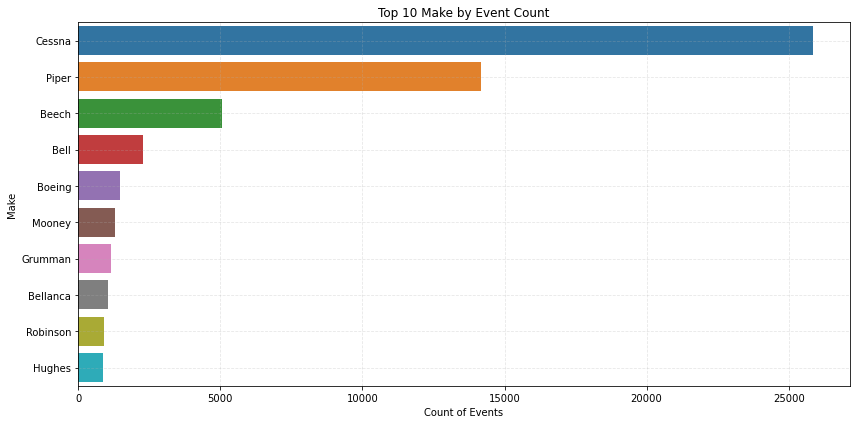

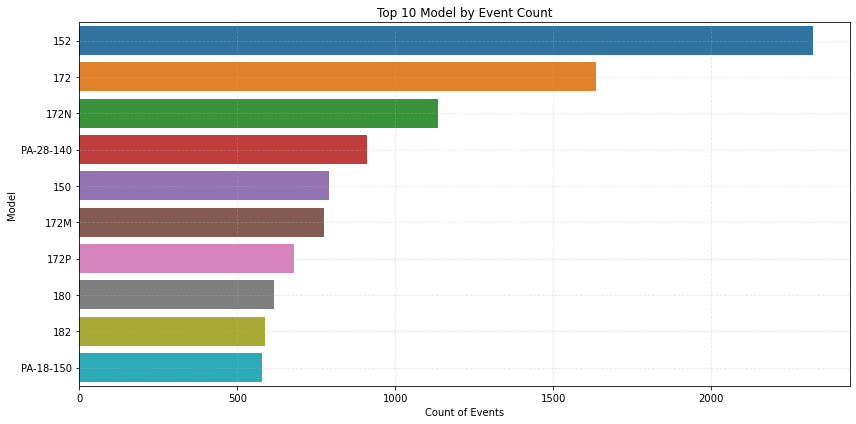

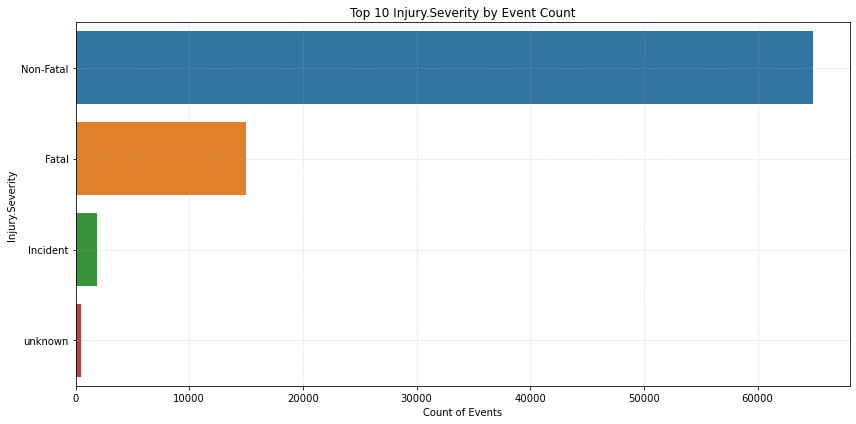

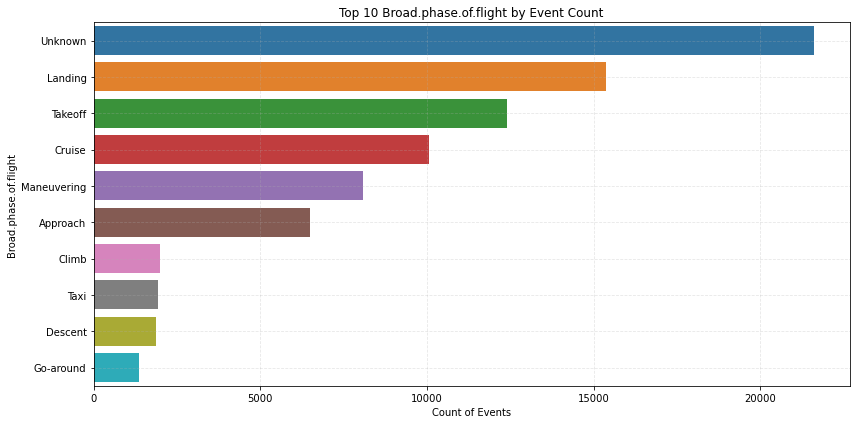

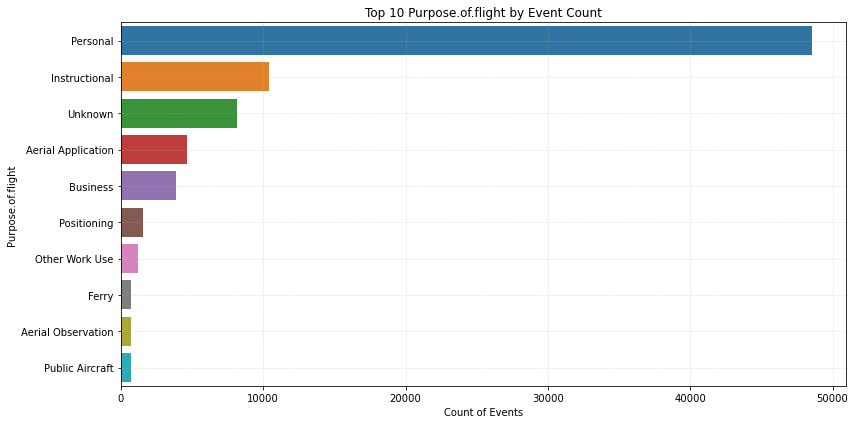

In [43]:
# Categorical columns to visualize
categorical_cols = [
    'Make',
    'Model',
    'Injury.Severity',
    'Broad.phase.of.flight',
    'Purpose.of.flight'
]

# Limit number of categories for clearer plots
top_n = 10

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Get top N categories to avoid clutter (especially for Make/Model)
    top_vals = dfUS[col].value_counts().nlargest(top_n).index
    subset = dfUS[dfUS[col].isin(top_vals)]
    
    sns.countplot(data=subset, y=col, order=top_vals)
    plt.title(f'Top {top_n} {col} by Event Count')
    plt.xlabel('Count of Events')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

Since we have seen that loss of life and aeroplane damage is bound to be substantial in the clearest of weather and any accident, we should focus on aircraft specifics and accident frequency.  
1.Cessna and piper has the highest accident risk.  
2. The 152 models have the highest accident rate.  
3.Most accidents have no indication at what phase do planes crush but landing and takeoff are the first and second runner-ups respectfully.  
4. Most accidents are non fatal.  
5. Aircrafts used for personal and instructional purposes have the highest accident rate

All these aircraft attriutes should be avoided, bought with precaution or focus on new models with new advancements for optimal flight control ad 

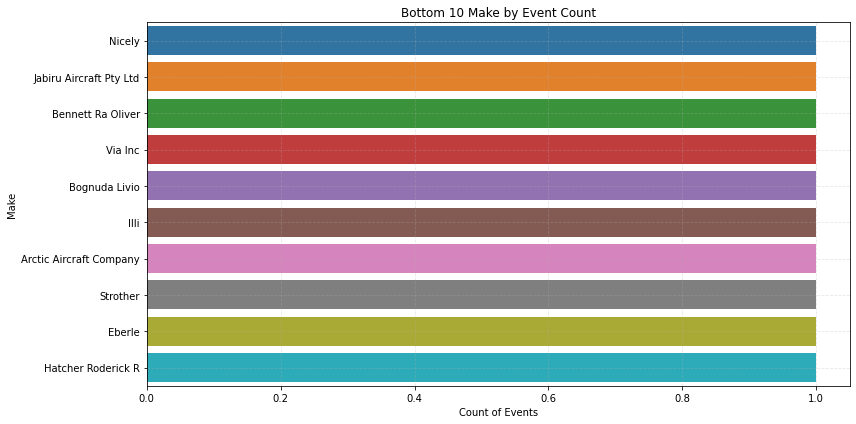

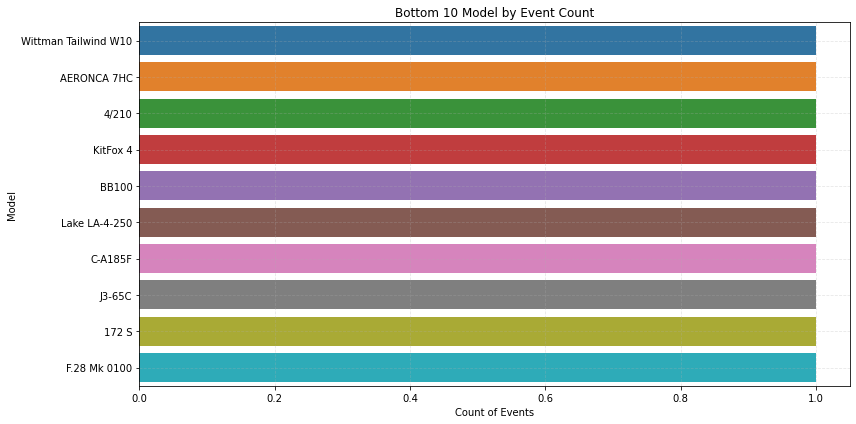

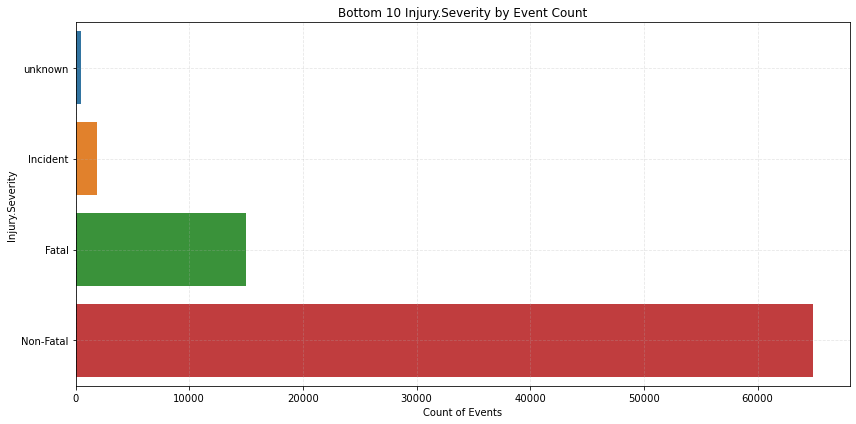

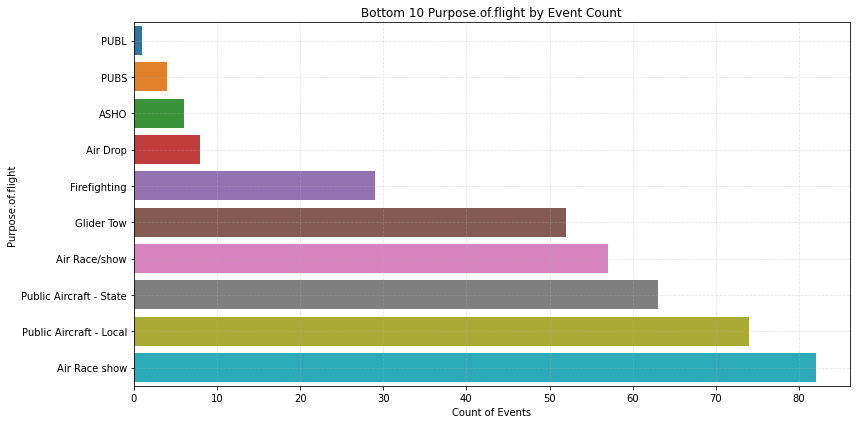

In [44]:
# Define categorical columns
categorical_cols1 = [
    'Make',
    'Model',
    'Injury.Severity',
    'Purpose.of.flight'
]
bottom_n = 10
for col in categorical_cols1:
    plt.figure(figsize=(12, 6))
    
    # Get bottom 10 categories (non-zero counts)
    bottom_vals = dfUS[col].value_counts().loc[lambda x: x > 0].nsmallest(bottom_n).index
    subset = dfUS[dfUS[col].isin(bottom_vals)]
    
    sns.countplot(data=subset, y=col, order=bottom_vals)
    plt.title(f'Bottom {bottom_n} {col} by Event Count')
    plt.xlabel('Count of Events')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.show()


In [46]:
dfUS.to_csv("Cleaned_AviationData3.csv", index=False)